*This notebook is used for the Coursera Capstone Project*

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
print ("Hello Capstone Project Course!")

Hello Capstone Project Course!


Import packages

In [4]:
import pandas as pd
import matplotlib.pylab as plt

Reading and extracting relevant data

In [5]:
filename = "C:/Users/Home/Desktop/Jupyter Notebooks/Data-Collisions.csv"

In [11]:
df = pd.read_csv(filename)
print(df.shape)
df.head()

(194673, 38)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [8]:
#EXtract relevant attributes that are commonly reported in accident reporting
df = df[["SEVERITYDESC","ADDRTYPE","COLLISIONTYPE","PERSONCOUNT","PEDCOUNT","PEDCYLCOUNT","VEHCOUNT","WEATHER","ROADCOND","LIGHTCOND","HITPARKEDCAR"]]
print(df.shape)
df.head()

(194673, 11)


,SEVERITYDESC,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,WEATHER,ROADCOND,LIGHTCOND,HITPARKEDCAR
0,Injury Collision,Intersection,Angles,2,0,0,2,Overcast,Wet,Daylight,N
1,Property Damage Only Collision,Block,Sideswipe,2,0,0,2,Raining,Wet,Dark - Street Lights On,N
2,Property Damage Only Collision,Block,Parked Car,4,0,0,3,Overcast,Dry,Daylight,N
3,Property Damage Only Collision,Block,Other,3,0,0,3,Clear,Dry,Daylight,N
4,Injury Collision,Intersection,Angles,2,0,0,2,Raining,Wet,Daylight,N


Data cleaning
1) Identify missing data  
2) Drop missing data  
3) Data analysis and description  
3) Correlation matrix for features  
4) One hot encoding to create dummies for features  
5) Create target and features datasets

In [28]:
missing_data = df.isnull()
missing_data.head(5)

,SEVERITYDESC,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,WEATHER,ROADCOND,LIGHTCOND,HITPARKEDCAR
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False


In [29]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")   

SEVERITYDESC
False    194673
Name: SEVERITYDESC, dtype: int64

ADDRTYPE
False    192747
True       1926
Name: ADDRTYPE, dtype: int64

COLLISIONTYPE
False    189769
True       4904
Name: COLLISIONTYPE, dtype: int64

PERSONCOUNT
False    194673
Name: PERSONCOUNT, dtype: int64

PEDCOUNT
False    194673
Name: PEDCOUNT, dtype: int64

PEDCYLCOUNT
False    194673
Name: PEDCYLCOUNT, dtype: int64

VEHCOUNT
False    194673
Name: VEHCOUNT, dtype: int64

WEATHER
False    189592
True       5081
Name: WEATHER, dtype: int64

ROADCOND
False    189661
True       5012
Name: ROADCOND, dtype: int64

LIGHTCOND
False    189503
True       5170
Name: LIGHTCOND, dtype: int64

HITPARKEDCAR
False    194673
Name: HITPARKEDCAR, dtype: int64



In [30]:
df.dropna(subset=["ADDRTYPE","COLLISIONTYPE","WEATHER", "ROADCOND","LIGHTCOND"], axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)
df.shape

(187504, 11)

In [31]:
df.describe(include=['object'])

,SEVERITYDESC,ADDRTYPE,COLLISIONTYPE,WEATHER,ROADCOND,LIGHTCOND,HITPARKEDCAR
count,187504,187504,187504,187504,187504,187504,187504
unique,2,3,10,11,9,9,2
top,Property Damage Only Collision,Block,Parked Car,Clear,Dry,Daylight,N
freq,130634,123315,46679,110493,123730,115395,180864


In [32]:
for column in df.columns.values.tolist():
    print(column)
    print (df[column].value_counts())
    print("")  

SEVERITYDESC
Property Damage Only Collision    130634
Injury Collision                   56870
Name: SEVERITYDESC, dtype: int64

ADDRTYPE
Block           123315
Intersection     63447
Alley              742
Name: ADDRTYPE, dtype: int64

COLLISIONTYPE
Parked Car    46679
Angles        34555
Rear Ended    33794
Other         23440
Sideswipe     18442
Left Turn     13659
Pedestrian     6589
Cycles         5399
Right Turn     2936
Head On        2011
Name: COLLISIONTYPE, dtype: int64

PERSONCOUNT
2     109553
3      34984
4      14389
1      11581
5       6560
0       5505
6       2695
7       1126
8        533
9        214
10       127
11        56
12        33
13        21
14        19
15        11
17        11
16         8
44         6
18         6
20         6
25         6
19         5
26         4
22         4
27         3
28         3
29         3
47         3
32         3
34         3
37         3
23         2
21         2
24         2
30         2
36         2
57         1
31      

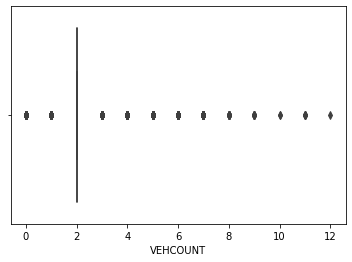

In [13]:
import seaborn as sns
sns.boxplot(df['VEHCOUNT'])

In [24]:
df = pd.concat([df,pd.get_dummies(df[["ADDRTYPE","COLLISIONTYPE","WEATHER","ROADCOND","LIGHTCOND"]])], axis=1)
df.drop(["SEVERITYDESC","ADDRTYPE","COLLISIONTYPE","WEATHER","ROADCOND","LIGHTCOND"], axis = 1,inplace=True)
df.head()

,SEVERITYCODE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,HITPARKEDCAR,ADDRTYPE_Alley,ADDRTYPE_Block,ADDRTYPE_Intersection,COLLISIONTYPE_Angles,...,ROADCOND_Wet,LIGHTCOND_Dark - No Street Lights,LIGHTCOND_Dark - Street Lights Off,LIGHTCOND_Dark - Street Lights On,LIGHTCOND_Dark - Unknown Lighting,LIGHTCOND_Dawn,LIGHTCOND_Daylight,LIGHTCOND_Dusk,LIGHTCOND_Other,LIGHTCOND_Unknown
0,2,2,0,0,2,N,0,0,1,1,...,1,0,0,0,0,0,1,0,0,0
1,1,2,0,0,2,N,0,1,0,0,...,1,0,0,1,0,0,0,0,0,0
2,1,4,0,0,3,N,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,3,0,0,3,N,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,2,2,0,0,2,N,0,0,1,1,...,1,0,0,0,0,0,1,0,0,0


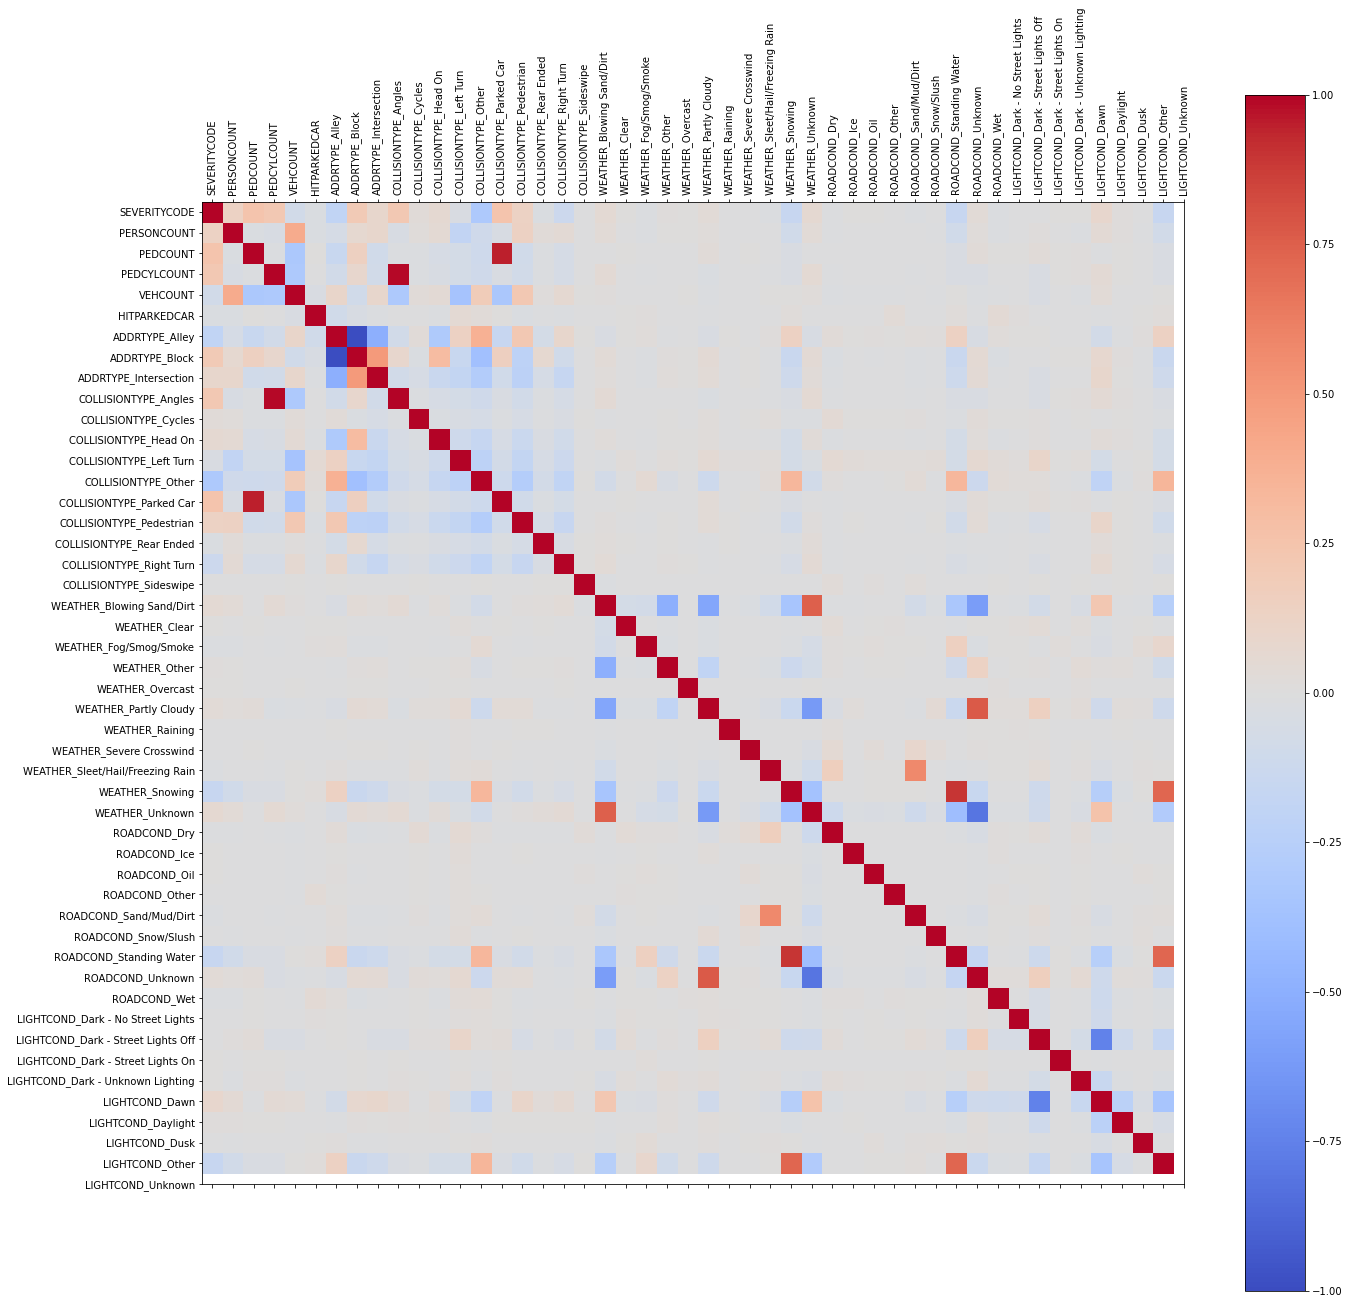

In [25]:
corr = df.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
fig.set_size_inches(22, 22)
ticks = np.arange(0,len(df.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)
plt.show()

In [12]:
#rename values in attributes
df['LIGHTCOND'].replace(to_replace=['Dark - Street Lights On','Dark - No Street Lights','Dark - Street Lights Off','Dark - Unknown Lighting'], value=['Dark','Dark','Dark','Dark'],inplace=True)
df['ROADCOND'].replace(to_replace=['Other','Standing Water','Sand/Mud/Dirt','Oil'], value=['Other substance','Other substance','Other substance','Other substance'],inplace=True)
df.head()

,SEVERITYCODE,SEVERITYDESC,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,WEATHER,ROADCOND,LIGHTCOND,HITPARKEDCAR
0,2,Injury Collision,Intersection,Angles,2,0,0,2,Overcast,Wet,Daylight,N
1,1,Property Damage Only Collision,Block,Sideswipe,2,0,0,2,Raining,Wet,Dark,N
2,1,Property Damage Only Collision,Block,Parked Car,4,0,0,3,Overcast,Dry,Daylight,N
3,1,Property Damage Only Collision,Block,Other,3,0,0,3,Clear,Dry,Daylight,N
4,2,Injury Collision,Intersection,Angles,2,0,0,2,Raining,Wet,Daylight,N


In [17]:
Feature = df[["ADDRTYPE","COLLISIONTYPE","PERSONCOUNT","PEDCOUNT","PEDCYLCOUNT","VEHCOUNT","WEATHER","ROADCOND","LIGHTCOND"]]
Feature = pd.concat([Feature,pd.get_dummies(df[["ADDRTYPE","COLLISIONTYPE","WEATHER","ROADCOND","LIGHTCOND"]])], axis=1)
Feature.drop(["ADDRTYPE","COLLISIONTYPE","WEATHER","ROADCOND","LIGHTCOND"], axis = 1,inplace=True)
Feature.head()

,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,ADDRTYPE_Alley,ADDRTYPE_Block,ADDRTYPE_Intersection,COLLISIONTYPE_Angles,COLLISIONTYPE_Cycles,COLLISIONTYPE_Head On,...,ROADCOND_Wet,LIGHTCOND_Dark - No Street Lights,LIGHTCOND_Dark - Street Lights Off,LIGHTCOND_Dark - Street Lights On,LIGHTCOND_Dark - Unknown Lighting,LIGHTCOND_Dawn,LIGHTCOND_Daylight,LIGHTCOND_Dusk,LIGHTCOND_Other,LIGHTCOND_Unknown
0,2,0,0,2,0,0,1,1,0,0,...,1,0,0,0,0,0,1,0,0,0
1,2,0,0,2,0,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
2,4,0,0,3,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,3,0,0,3,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,2,0,0,2,0,0,1,1,0,0,...,1,0,0,0,0,0,1,0,0,0


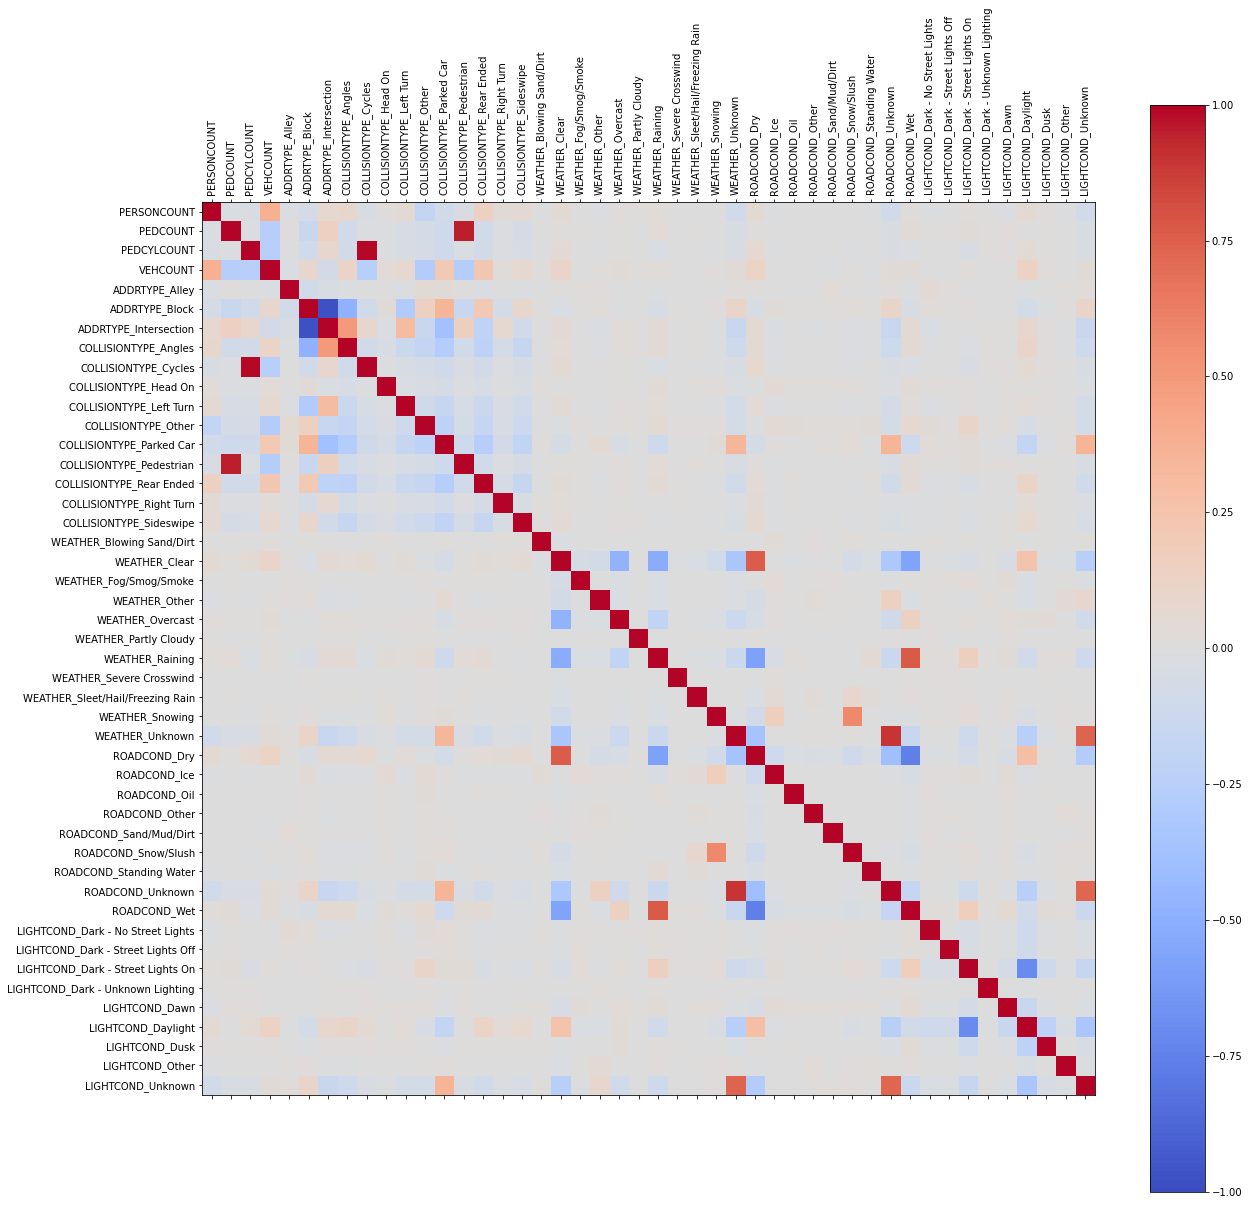

In [29]:
corr = Feature.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
fig.set_size_inches(20, 20)
ticks = np.arange(0,len(Feature.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(Feature.columns)
ax.set_yticklabels(Feature.columns)
plt.show()

KeyError: "['WEATHER', 'ROADCOND', 'ADDRTYPE', 'COLLISIONTYPE', 'LIGHTCOND'] not in index"

In [14]:
X = Feature.values
X[0:5]

NameError: name 'Feature' is not defined

In [16]:
y = df['SEVERITYCODE'].values
y[0:5]

array([2, 1, 1, 1, 2], dtype=int64)

Model selection and training

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

In [19]:
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (131252, 40) (131252,)
Test set: (56252, 40) (56252,)


Decision Tree

In [20]:
from sklearn.tree import DecisionTreeClassifier
DT_model = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
DT_model.fit(X_train,y_train)
DT_model

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [21]:
yhat = DT_model.predict(X_test)
yhat

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [22]:
print (yhat [0:5])
print (y_test [0:5])

[1 1 1 1 1]
[1 2 1 1 1]


In [23]:
from sklearn import metrics
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn import tree
from sklearn import datasets
from matplotlib import pyplot as plt

In [24]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, yhat))
print("DecisionTrees's Jaccard index: %.2f" % jaccard_score(y_test, yhat))
print("DecisionTrees's F1-score: %.2f" % f1_score(y_test, yhat, average='weighted'))

DecisionTrees's Accuracy:  0.748133399701344
DecisionTrees's Jaccard index: 0.73
DecisionTrees's F1-score: 0.68


In [25]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,2]))

[[38857   398]
 [13770  3227]]


Confusion matrix, without normalization
[[38857   398]
 [13770  3227]]


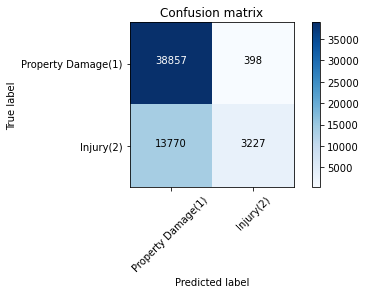

In [26]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,2])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Property Damage(1)','Injury(2)'],normalize= False,  title='Confusion matrix')

[Text(167.4, 195.696, 'X[12] <= 0.5\nentropy = 0.886\nsamples = 131252\nvalue = [91379, 39873]'),
 Text(83.7, 152.208, 'X[1] <= 0.5\nentropy = 0.962\nsamples = 98551\nvalue = [60568, 37983]'),
 Text(41.85, 108.72, 'X[2] <= 0.5\nentropy = 0.942\nsamples = 93730\nvalue = [60089, 33641]'),
 Text(20.925, 65.232, 'X[16] <= 0.5\nentropy = 0.922\nsamples = 89948\nvalue = [59607, 30341]'),
 Text(10.4625, 21.744, 'entropy = 0.952\nsamples = 77066\nvalue = [48440, 28626]'),
 Text(31.387500000000003, 21.744, 'entropy = 0.566\nsamples = 12882\nvalue = [11167, 1715]'),
 Text(62.775000000000006, 65.232, 'X[39] <= 0.5\nentropy = 0.55\nsamples = 3782\nvalue = [482, 3300]'),
 Text(52.3125, 21.744, 'entropy = 0.534\nsamples = 3718\nvalue = [452, 3266]'),
 Text(73.2375, 21.744, 'entropy = 0.997\nsamples = 64\nvalue = [30, 34]'),
 Text(125.55000000000001, 108.72, 'X[2] <= 0.5\nentropy = 0.467\nsamples = 4821\nvalue = [479, 4342]'),
 Text(104.625, 65.232, 'X[8] <= 0.5\nentropy = 0.47\nsamples = 4757\nvalue

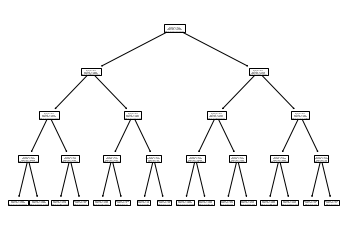

In [27]:
tree.plot_tree(DT_model) 

Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [29]:
yhat = LR.predict(X_test)
yhat

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [30]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.98, 0.02],
       [0.58, 0.42],
       [0.53, 0.47],
       ...,
       [0.59, 0.41],
       [0.55, 0.45],
       [0.62, 0.38]])

In [31]:
from sklearn.metrics import log_loss
print("LR's Accuracy: ", metrics.accuracy_score(y_test, yhat))
print("LR's Jaccard index: %.2f" % jaccard_score(y_test, yhat))
print("LR's F1-score: %.2f" % f1_score(y_test, yhat, average='weighted'))
print("LR's LogLoss: %.2f" % log_loss(y_test, yhat_prob))

LR's Accuracy:  0.7541065206570433
LR's Jaccard index: 0.73
LR's F1-score: 0.71
LR's LogLoss: 0.48


In [32]:
print(confusion_matrix(y_test, yhat, labels=[1,2]))

[[37794  1461]
 [12371  4626]]


Confusion matrix, without normalization
[[37794  1461]
 [12371  4626]]


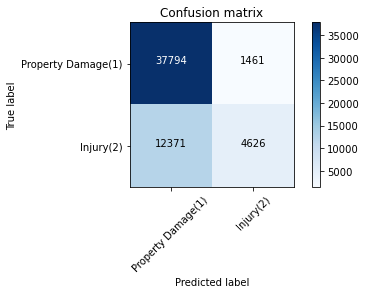

In [33]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,2])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Property Damage(1)','Injury(2)'],normalize= False,  title='Confusion matrix')

SVM